In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [181]:
#Import data
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])

In [182]:
#Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

Text(0.5, 0, 'Date')

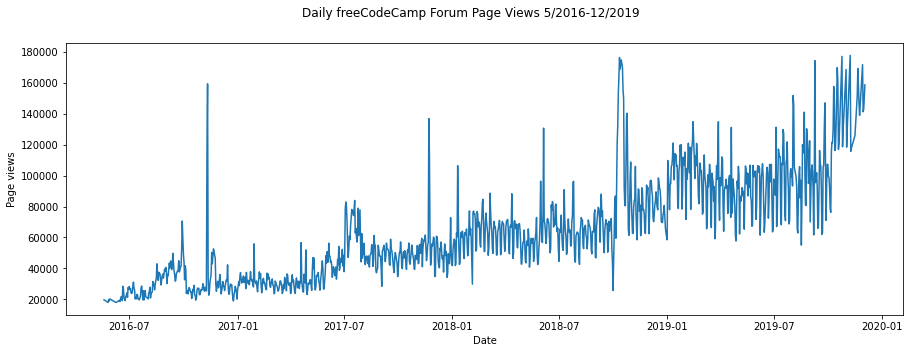

In [183]:
fig = plt.subplots(figsize=(15,5))

fig = plt.plot(df['value'])
plt.suptitle('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.ylabel('Page views')
plt.xlabel('Date')


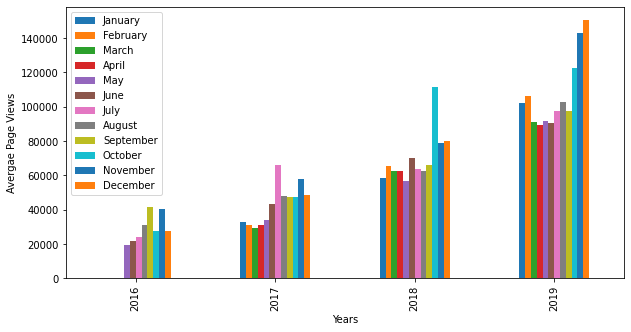

In [184]:
df['month'] = df.index.month
df['year'] = df.index.year

df_bar = df.groupby(['year', 'month'])['value'].mean()

df_bar = df_bar.unstack()

fig = df_bar.plot.bar(legend=True, figsize=(10,5), ylabel='Avergae Page Views', xlabel='Years').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [185]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0.5, 0, 'Month')

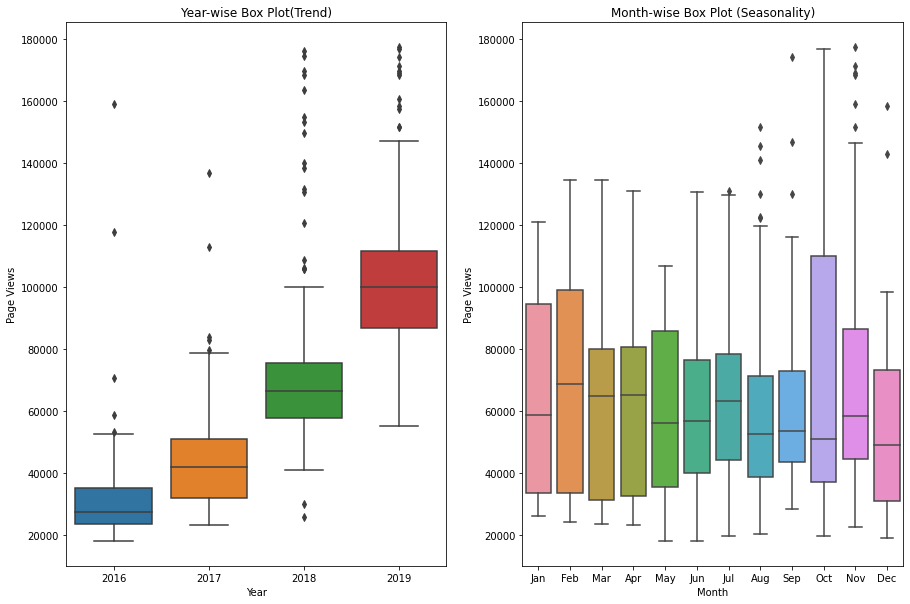

In [189]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,10))

axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0])

axes[0].set_title('Year-wise Box Plot(Trend)')
axes[0].set_ylabel('Page Views')
axes[0].set_xlabel('Year')

axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1])

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_ylabel('Page Views')
axes[1].set_xlabel('Month')